In [17]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [18]:
pip install opencv-python


[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.states.statevector import Statevector
from qiskit.quantum_info import DensityMatrix
from math import pi
from qiskit.circuit.library.standard_gates import RYGate

[[  0   0   0   0]
 [  0   0   0   0]
 [255 255 255 255]
 [255 255 255 255]]


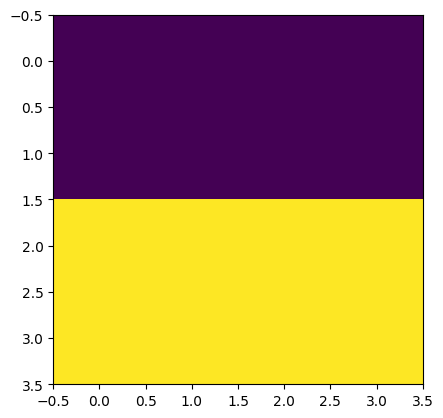

In [20]:
img = cv2.imread('2.jpg',cv2.IMREAD_GRAYSCALE)
print(img)
plt.imshow(img)

In [21]:
def get_U(n, thetas):
    c = ClassicalRegister(4)
    qr = QuantumRegister(n+1)
    qc = QuantumCircuit(qr,c)
    
    binary = []

    n_pixels = 2**n

    for i in range(n_pixels): 
            binary.append(f'{i:0{int(np.log2(n_pixels))}b}')

    RY_gate = RYGate(theta=2*thetas[0]).control(n)

    for i in range(n):
        qc.h(i)
    
    for i in range(n):
        qc.x(i)
        
    qc.barrier()
    
    qc.append(RY_gate, qr)

    qc.barrier()

    for j in range(n_pixels-1):
        ls_prev = binary[j]
        ls_next = binary[j+1]
    
        for i in range(n):
            if int(ls_prev[i]) == 0 and int(ls_next[i]) == 1:
                qc.x(i)
            
            if int(ls_prev[i]) == 1 and int(ls_next[i]) == 0:
                qc.x(i)
                
        RY_gate = RYGate(theta=2*thetas[j+1]).control(n)

        qc.append(RY_gate, qr)
 
        qc.barrier()
    
    return qc

In [22]:
image = np.array(img)
print(image)

[[  0   0   0   0]
 [  0   0   0   0]
 [255 255 255 255]
 [255 255 255 255]]


In [23]:
image= image/255
print(image)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [24]:
image = image * ((np.pi)/2)
image=image.flatten()

In [25]:
circ = get_U(4,image)

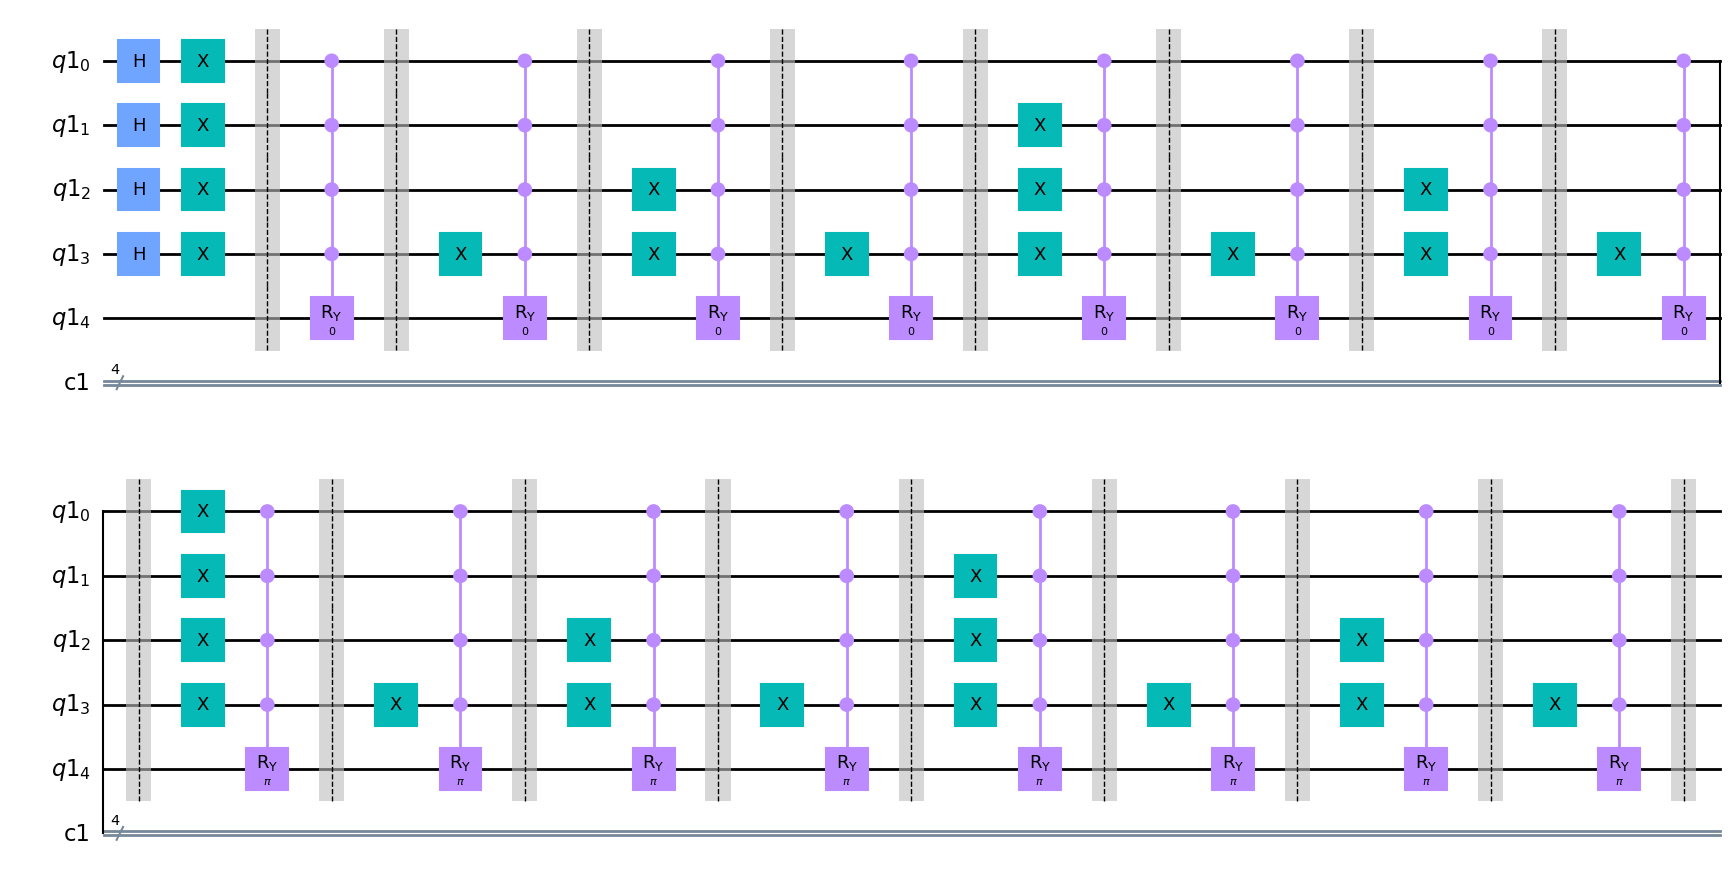

In [26]:
circ.draw()

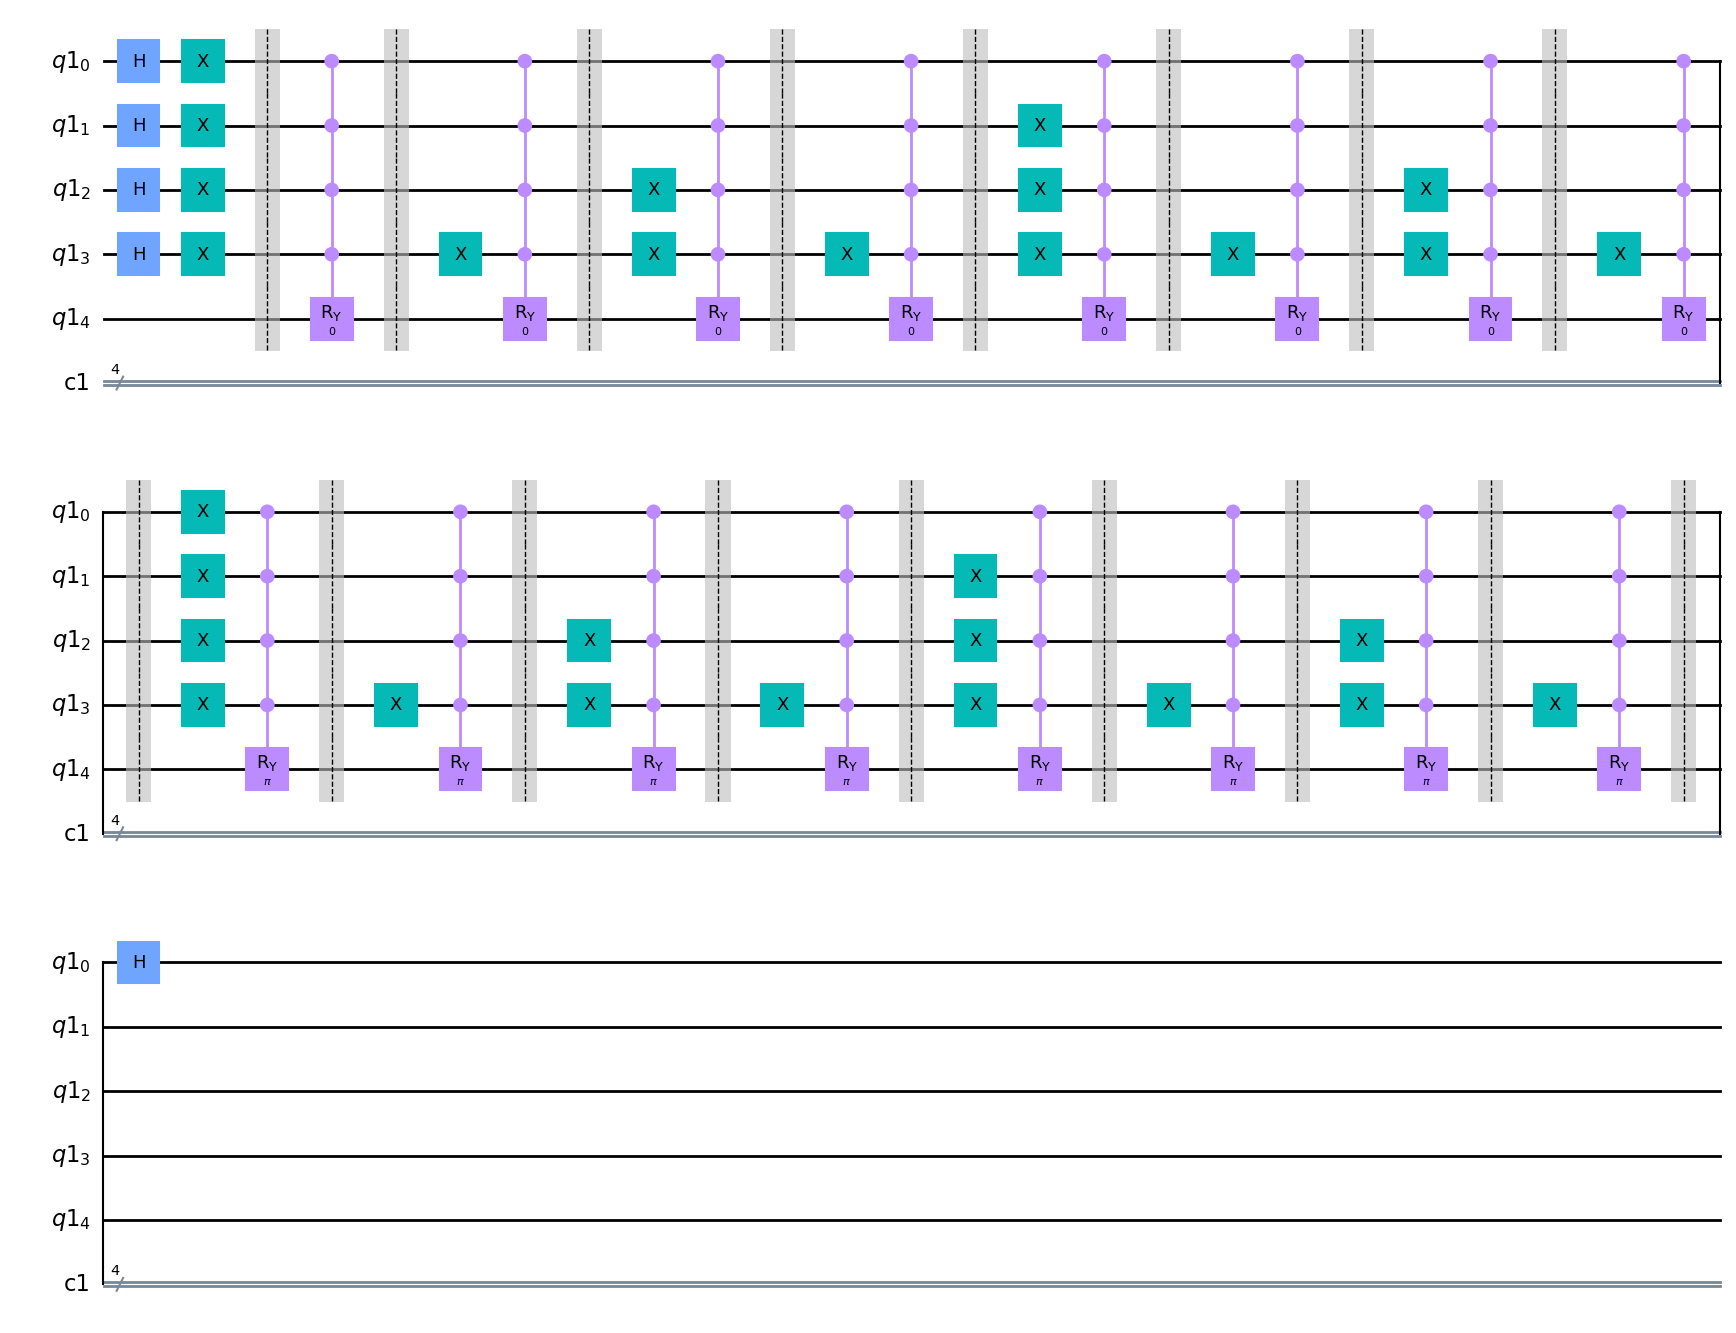

In [27]:
circ.h(0)
circ.draw()

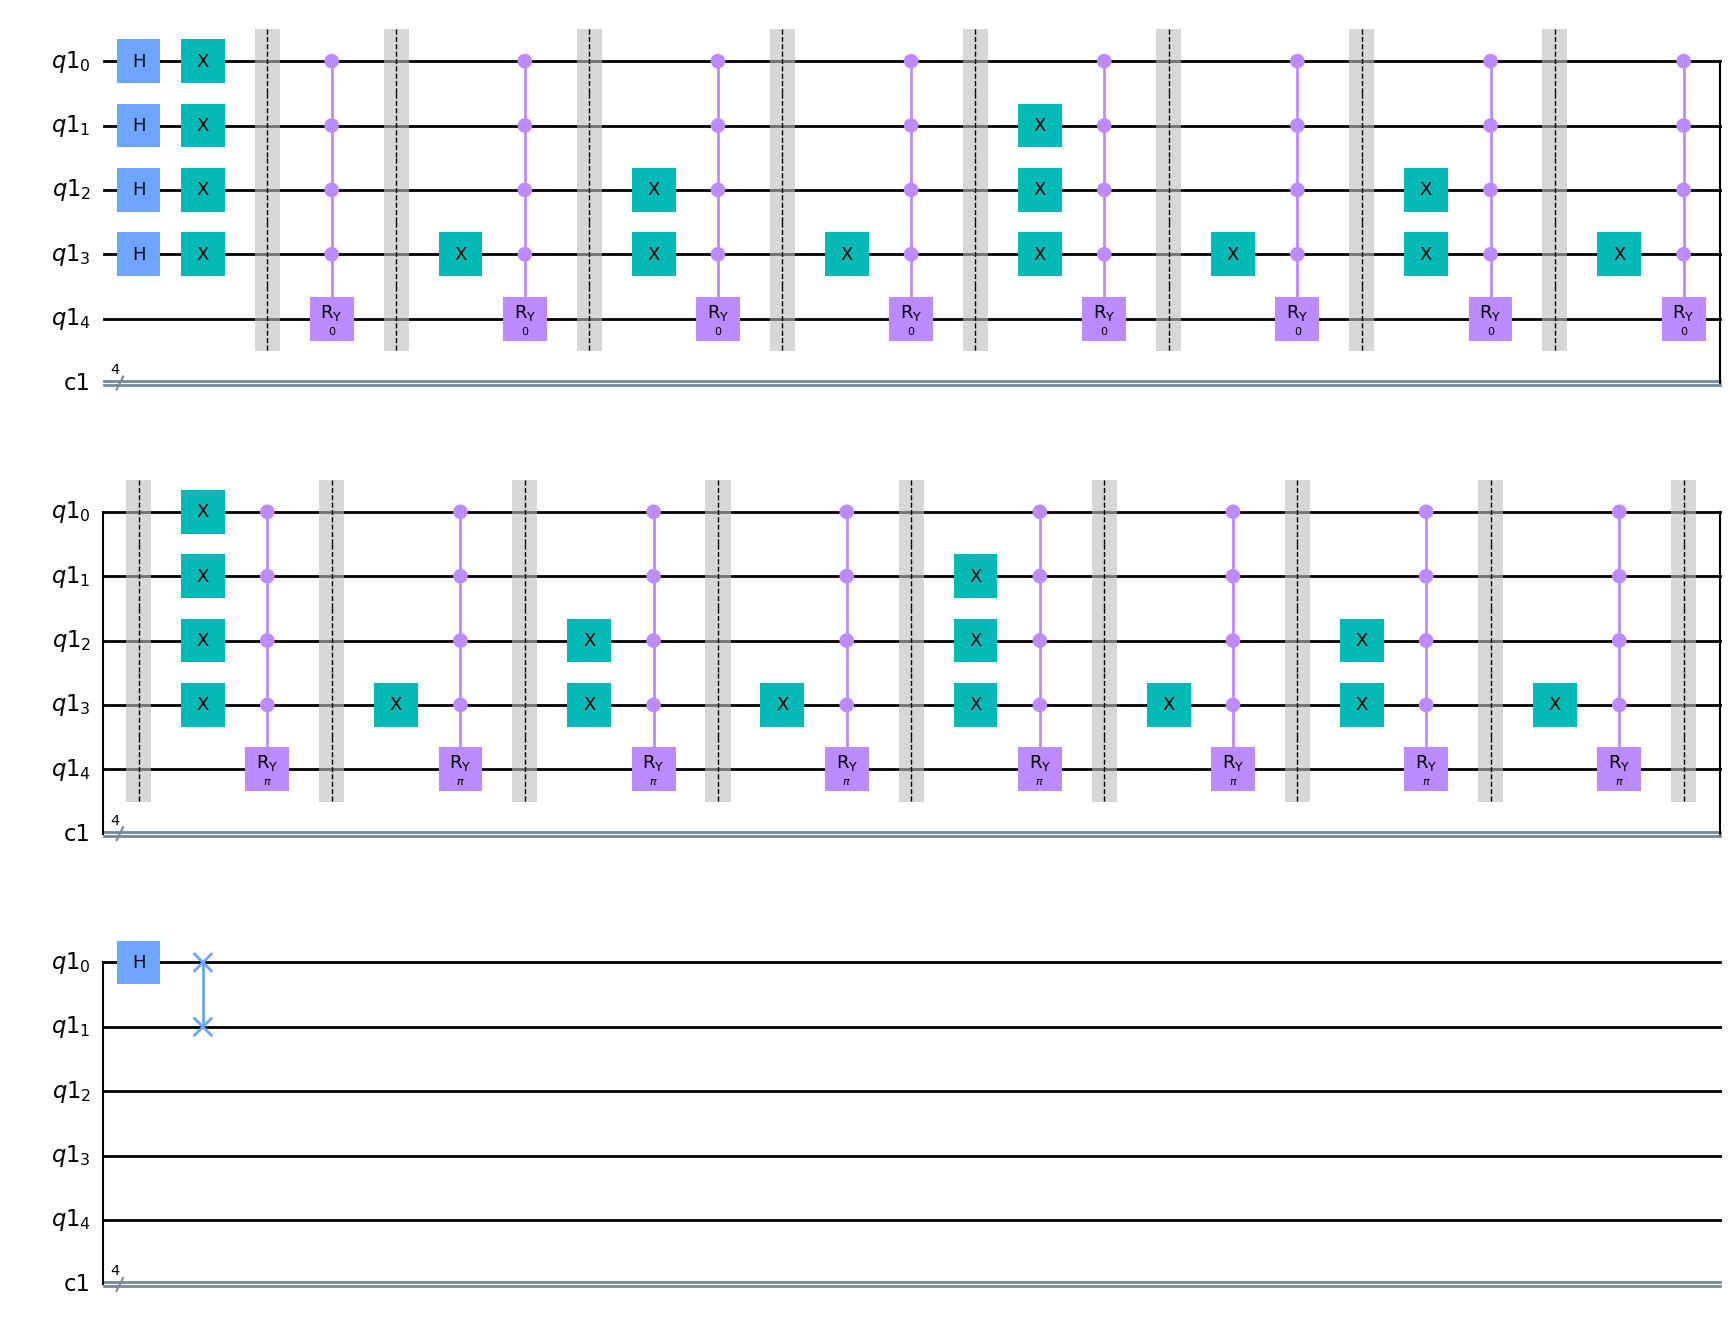

In [28]:
circ.swap(0,1)
circ.draw()

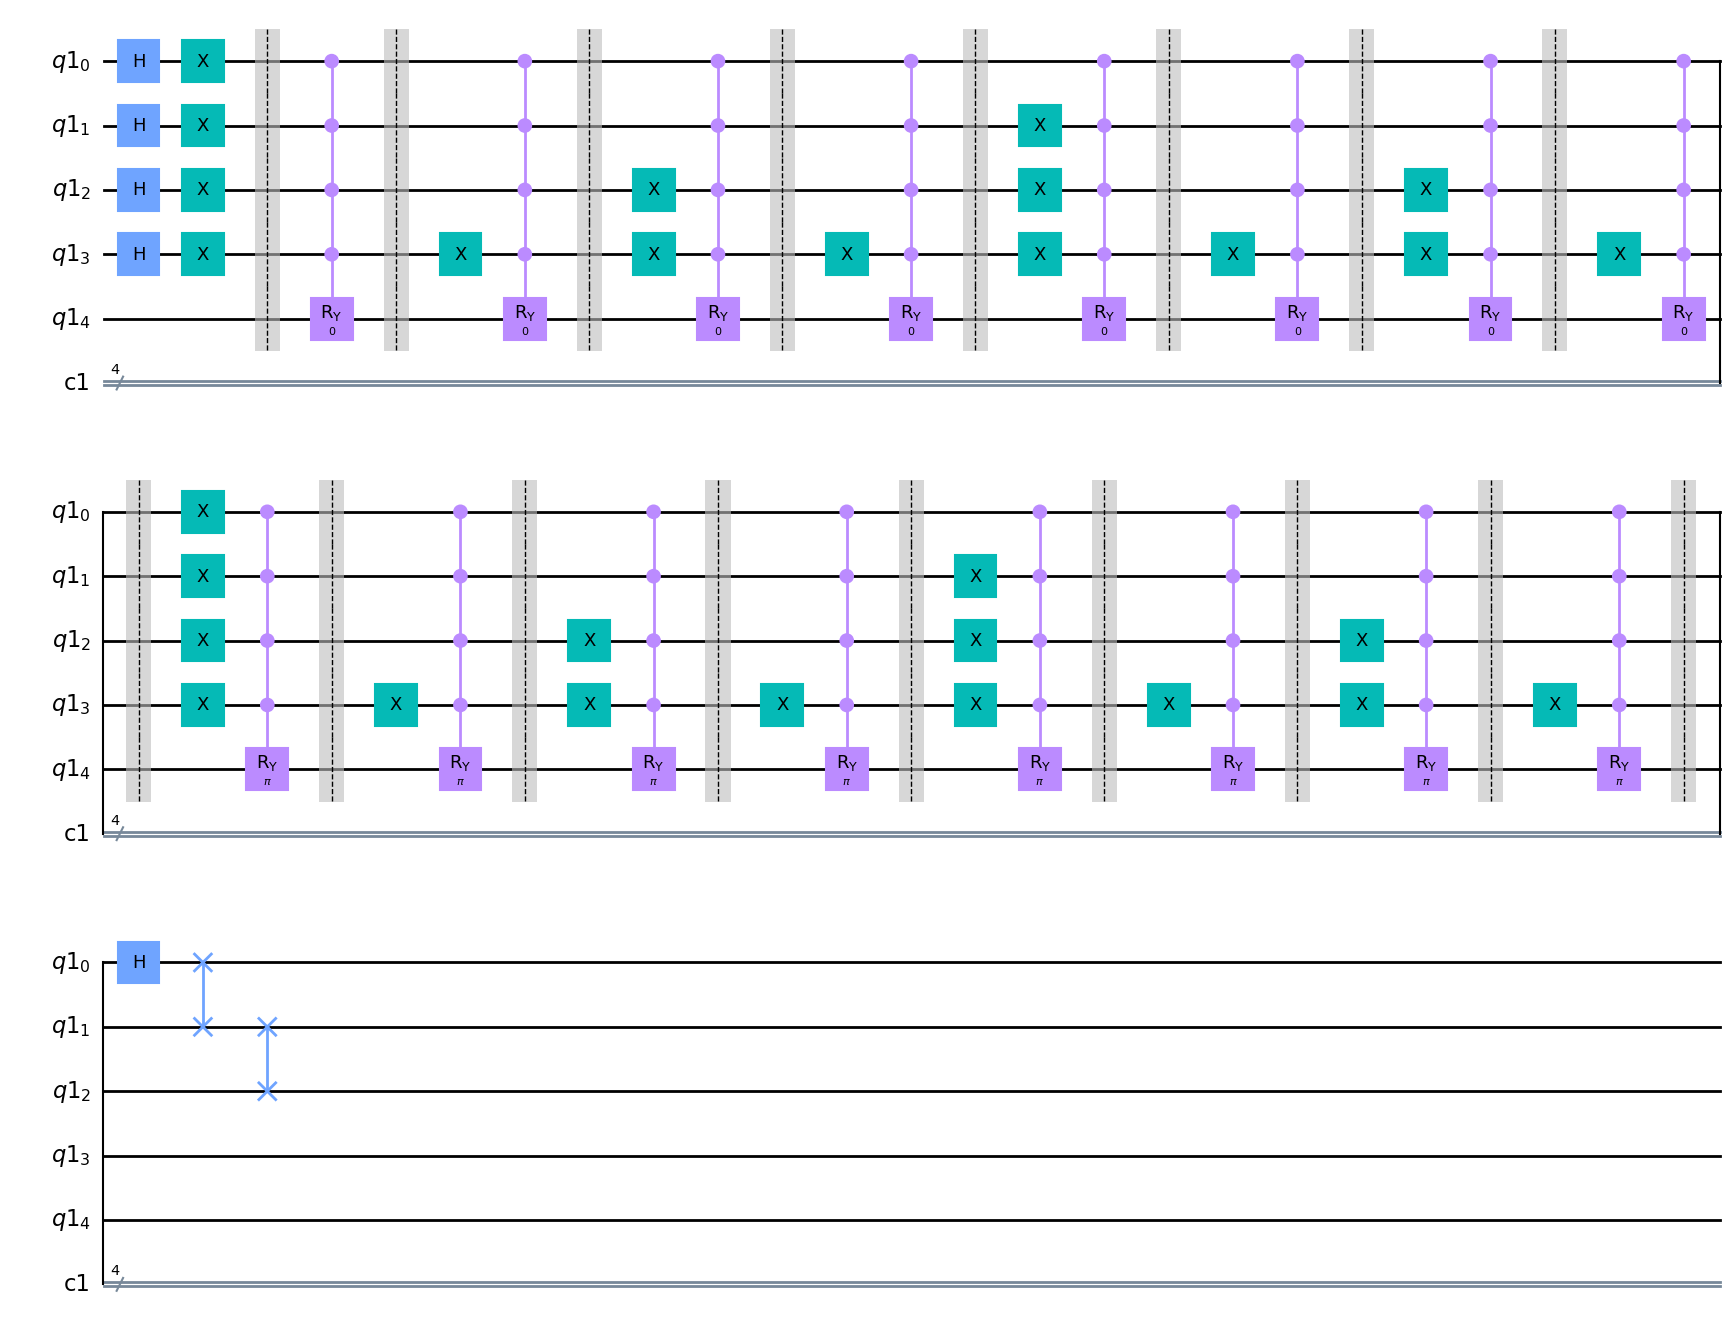

In [29]:
circ.swap(1,2)
circ.draw()

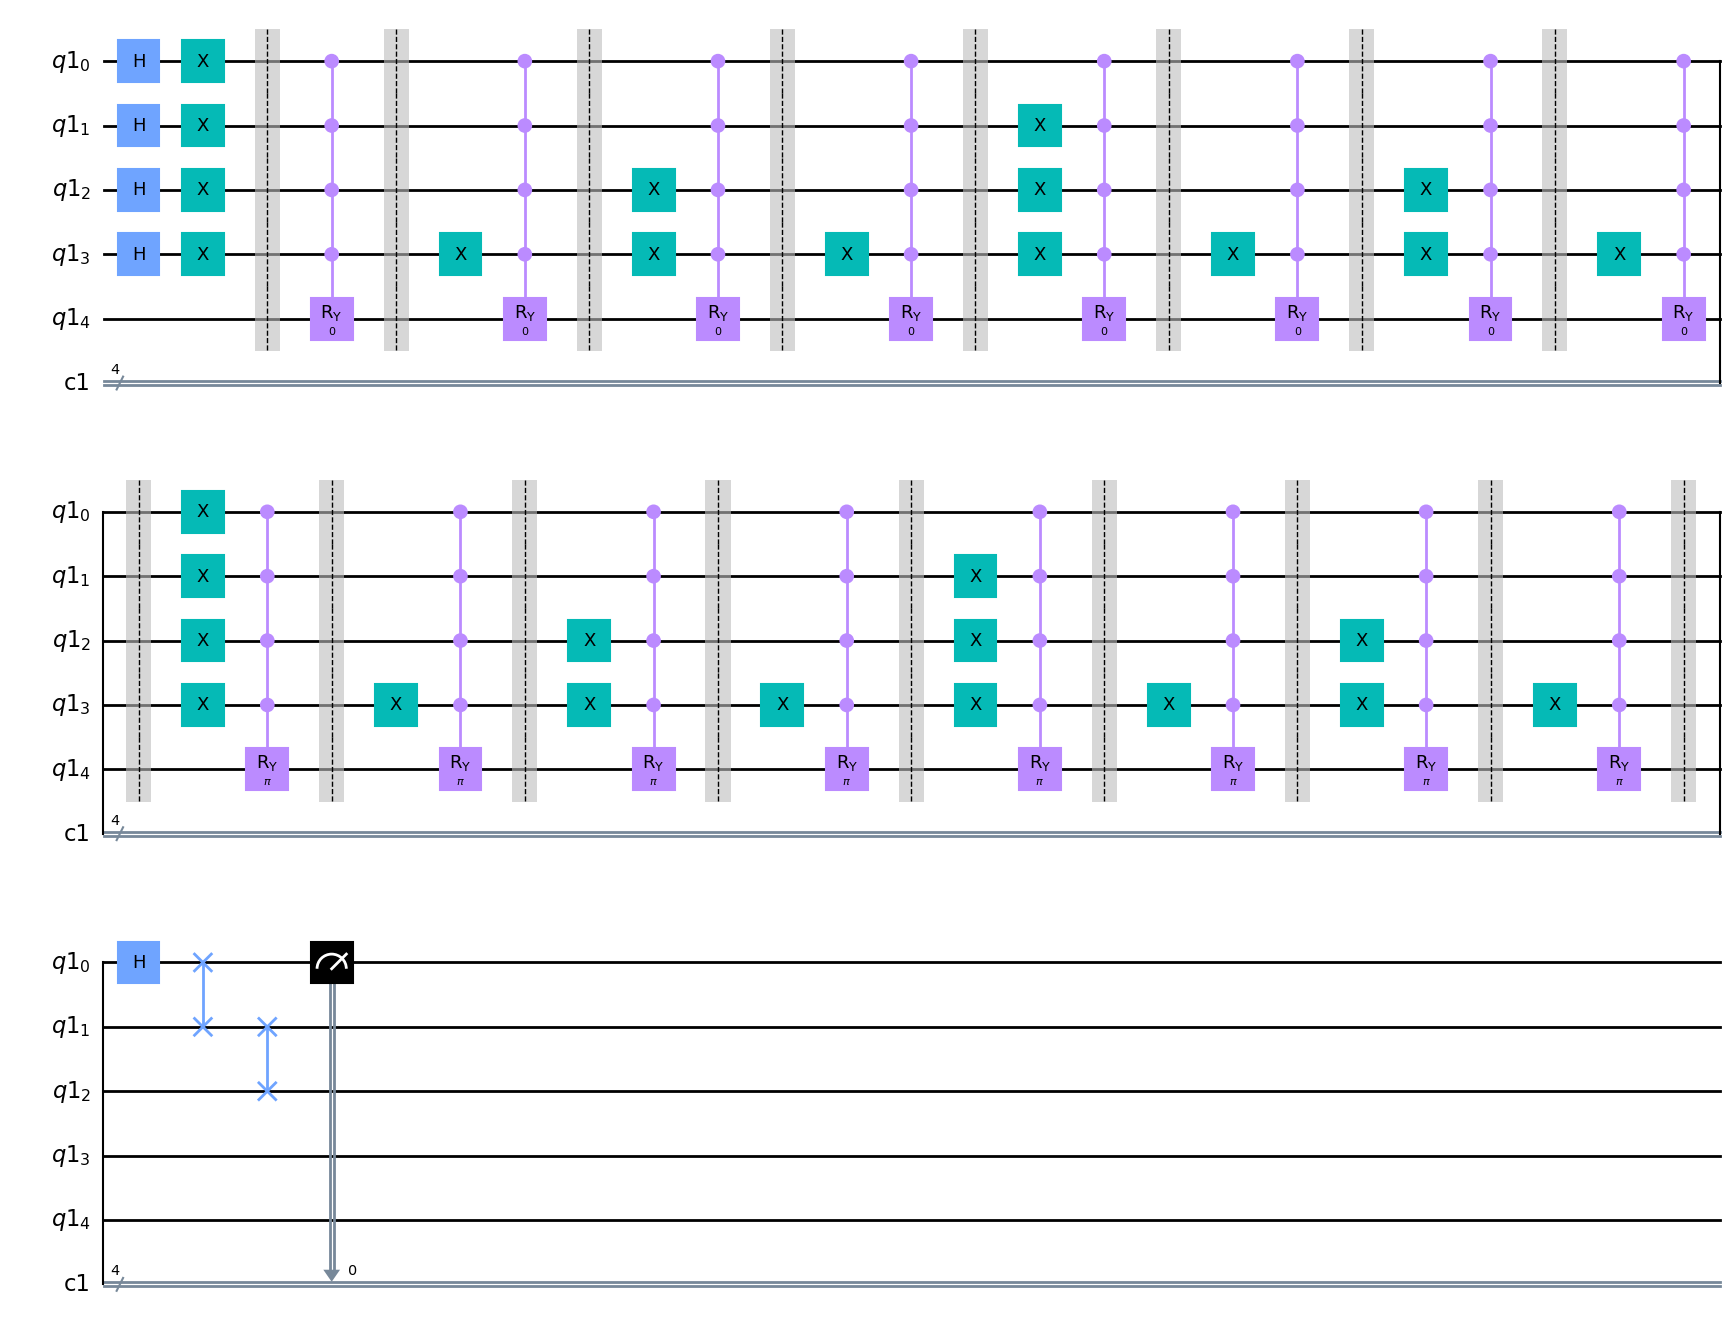

In [30]:
circ.measure(0,0)

circ.draw()

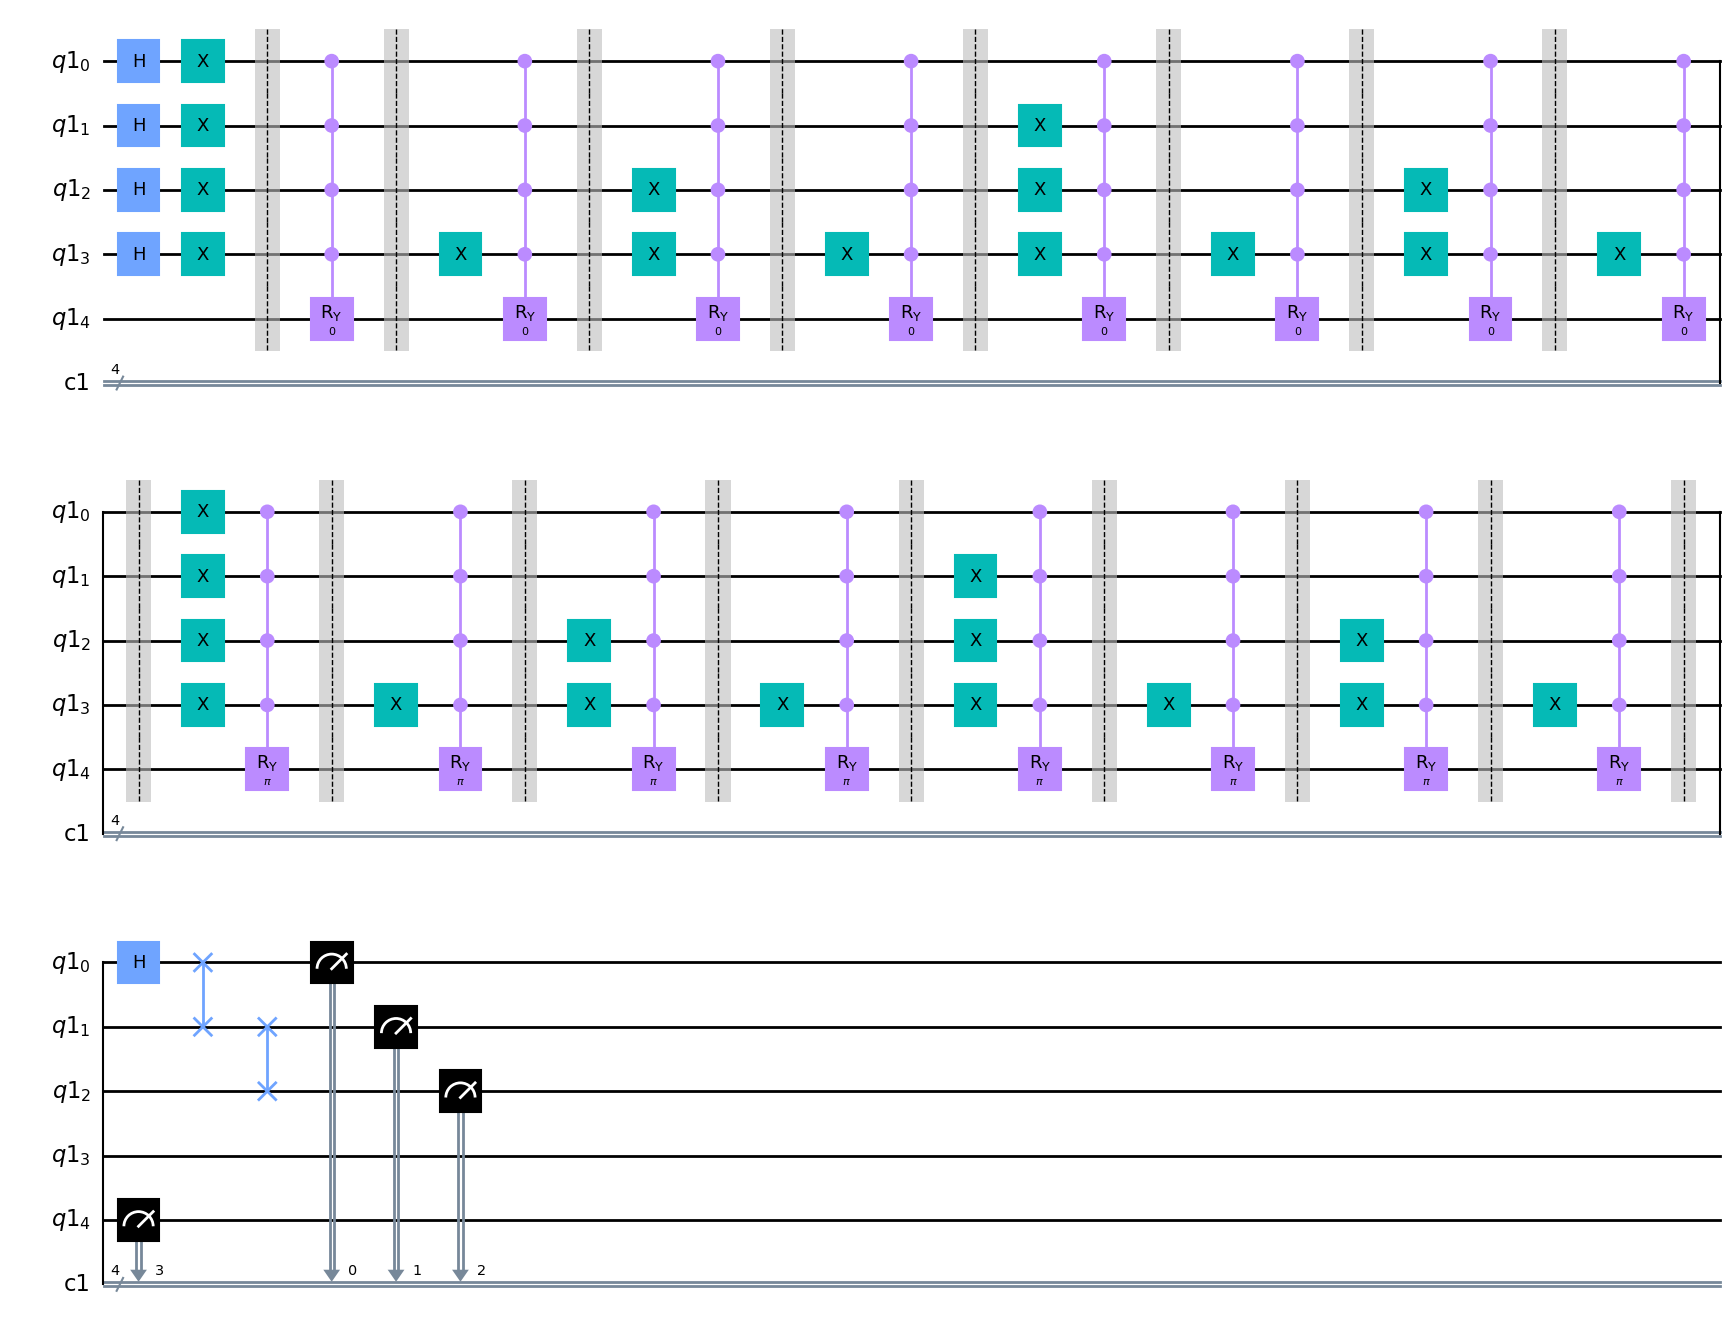

In [31]:
circ.measure(1,1)
circ.measure(2,2)
circ.measure(4,3)
circ.draw()

{'1010': 49, '1001': 73, '1101': 60, '1011': 64, '1000': 67, '0011': 55, '0010': 64, '0000': 58, '0001': 59, '1111': 67, '0111': 65, '1100': 64, '1110': 76, '0110': 62, '0101': 73, '0100': 68}


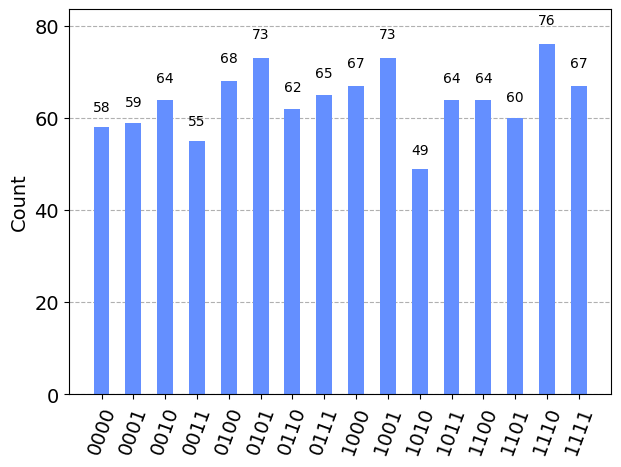

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, visualize_transition

backend_unitary = BasicAer.get_backend('unitary_simulator')
backend_qasm = BasicAer.get_backend('qasm_simulator')
backend_statevector = BasicAer.get_backend('statevector_simulator')

job = backend_qasm.run(transpile(circ, backend_qasm))
counts=job.result().get_counts()
print(counts)
plot_histogram(counts)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

counts = {'0110': 199, '1010': 24, '0100': 205, '0101': 219, '0111': 200, '1000': 30, '1011': 22, '1110': 28, '1111': 20, '0011': 3, '1101': 25, '1001': 23, '1100': 18, '0010': 4, '0001': 3, '0000': 1}

# Step 1: Normalize the counts
total_counts = sum(counts.values())
normalized_counts = {outcome: count / total_counts for outcome, count in counts.items()}

# Step 2: Prepare the image array
image_size =   # Assuming a 2x2 image for simplicity
image_array = np.zeros((image_size, image_size))

# Step 3: Set the pixel values
for outcome, probability in normalized_counts.items():
    row = int(outcome[:2], 2)  # Convert the first two bits of the outcome to decimal row index
    col = int(outcome[2:], 2)  # Convert the last two bits of the outcome to decimal column index
    image_array[row, col] = probability

# Step 4: Display the image
plt.imshow(image_array, cmap='gray', interpolation='nearest')
plt.show()


Traceback (most recent call last):
  File /opt/conda/lib/python3.10/site-packages/IPython/core/compilerop.py:86 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Cell In[33], line 11
    image_size =   # Assuming a 2x2 image for simplicity
                   ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.
